In [1]:
import numpy as np
import pandas as pd
import pyls
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from netneurotools import datasets, stats, plotting
from scipy.stats import zscore, pearsonr, ttest_ind
from scipy.spatial.distance import squareform, pdist
from scipy.stats import pearsonr

In [18]:
# Create an empty DataFrame for post hoc analysis
column_names = ['ID', 'age', 'sex', 'LC1_brain', 'LC1_behv']
post_hoc = pd.DataFrame(columns=column_names)

post_hoc['LC1_brain'] = pls_result.x_scores[:,0]
post_hoc['LC1_behv'] = pls_result.y_scores[:,0]

In [19]:
post_hoc['ID'] = df['ID']
post_hoc['PatientType2'] = df['PatientType2']
post_hoc['age'] = df['AgeAtBaseline']
post_hoc['sex'] = df['sex']

In [20]:
# Define a function to set the values of column "A" based on column "B"
def set_value(row):
    if row['PatientType2'] in [2, 3]:
        return 1
    elif row['PatientType2'] == 5:
        return 0

# Apply the function to create column "A"
post_hoc['SZ'] = post_hoc.apply(set_value, axis=1)

In [21]:
# Define a function to set the values of column "A" based on column "B"
def set_value(row):
    if row['PatientType2'] == 2:
        return 1
    elif row['PatientType2'] in [3, 5]:
        return 0

# Apply the function to create column "A"
post_hoc['Mood'] = post_hoc.apply(set_value, axis=1)
post_hoc

,ID,age,sex,LC1_brain,LC1_behv,PatientType2,SZ,Mood
0,104,24.440794,1.0,1.280224,1.357906,5.0,0,0
1,84,19.271732,1.0,-13.732187,-0.494944,3.0,1,0
2,25,18.620123,2.0,-0.600429,-0.872388,3.0,1,0
3,19,22.028747,1.0,-3.794841,-0.111517,2.0,1,1
4,23,21.774127,1.0,-7.839609,-2.763769,2.0,1,1
5,32,18.428474,2.0,-12.050935,-0.689256,3.0,1,0
6,93,21.377139,1.0,-2.110269,0.142344,2.0,1,1
7,108,17.615332,1.0,5.784001,-1.960797,3.0,1,0
8,97,21.242984,1.0,-17.832530,-3.036665,2.0,1,1
9,81,21.689254,1.0,-2.567175,-0.925732,2.0,1,1


In [22]:
ENIGMA = pd.read_csv('/u/project/CCN/cbearden/haleywan/qunex_studyfolder/analysis/scripts/PLS_MEND_Replication/ENIGMA_DUP+MED.csv')
post_hoc = pd.merge(ENIGMA, post_hoc, on='ID', how='left')
post_hoc = post_hoc.dropna(subset=['LC1_brain'])
post_hoc = post_hoc.rename(columns={'Duration of illness  at MR (months)': 'dup', 'Non-Cumulative chlorpromazine equivalents ': 'med'})


In [28]:
post_hoc['PatientType2'].value_counts()

2.0    35
3.0    18
5.0    12
Name: PatientType2, dtype: int64

In [23]:
post_hoc.columns

Index(['GRID', 'dup', 'IQ', 'Education (yrs)', 'med', 'ID', 'age', 'sex',
       'LC1_brain', 'LC1_behv', 'PatientType2', 'SZ', 'Mood'],
      dtype='object')

### Figure 1a. Composite scores correlation (color code by diagnosis)

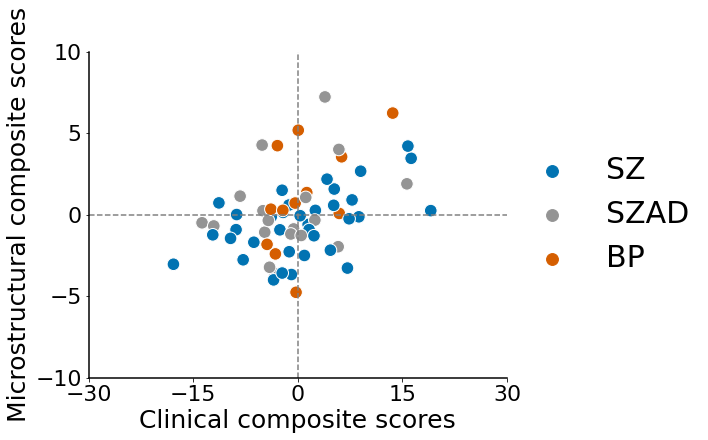

In [71]:
from matplotlib.ticker import MultipleLocator

# First, create the figure and set its facecolor to white
fig = plt.figure(facecolor='white', figsize=(7.5, 6))

# Get a palette with 3 colors
palette = sns.color_palette("colorblind", 12)

# Create a dictionary to map values in column C to colors
hue_colors = {
    2.0: palette[0],
    3.0: palette[7],
    5.0: palette[3],
    # add more categories if necessary
}

# Plot the scatter plot using Seaborn
# Using Seaborn
ax = sns.scatterplot(data=post_hoc, x='LC1_brain', y='LC1_behv', hue='PatientType2', palette=hue_colors, s=160)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set thicker border
ax.spines['left'].set_linewidth(1.5)  # Adjust the linewidth (1.5 in this example)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the linewidth (1.5 in this example)


# Add gray central dash lines
ax.axhline(y=0, color='gray', linestyle='--')
ax.axvline(x=0, color='gray', linestyle='--')

# Increase font size of axis tick labels
ax.tick_params(axis='both', labelsize=22)
ax.xaxis.set_major_locator(MultipleLocator(15))
ax.yaxis.set_major_locator(MultipleLocator(5))

# Set custom axis ranges
ax.set_xlim(-30, 30)  # Replace xmin and xmax with your desired values for the x-axis
ax.set_ylim(-10, 10) 

# Change x-axis and y-axis labels
ax.set_xlabel('Clinical composite scores', fontsize=25)
ax.set_ylabel('Microstructural composite scores', fontsize=25)

# Change the legend content
legend_font = {'size': 30} # Update legend labels
handles, labels = ax.get_legend_handles_labels()
legend_labels = {2.0: 'SZ', 3.0: 'SZAD', 5.0: 'BP'}  # Update with your desired legend labels

# Replace the original labels with your new labels
new_labels = [legend_labels[float(l)] for l in labels]

legend = ax.legend(handles, new_labels, bbox_to_anchor=(1.5, 0.5), loc='center right', frameon=False, prop=legend_font)

# Change legend dot size
for handle in legend.legendHandles:
    handle._sizes = [140]  # Set marker size. Adjust as needed.

# Adjust the legend position
plt.subplots_adjust(right=0.9)  # Increase or decrease the value to move the legend further outside

# Show the plot
plt.show()

### Figure 1b. Group differences in composite scores

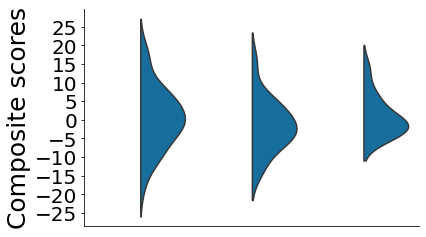

In [124]:
### Violin Plot ###

# Get a palette with 3 colors
palette = sns.color_palette("colorblind", 12)

# Create a dictionary to map values in column C to colors
hue_colors = {
    2.0: palette[0],
    3.0: palette[7],
    5.0: palette[3],
    # add more categories if necessary
}


ax = sns.violinplot(
    data=post_hoc,
    x="PatientType2", y="LC1_brain", hue=True, #palette=hue_colors, 
    hue_order=[False, True], split=True, color=palette[0],
    inner=None,   # This hides the boxplot inside the violins
    scale="area"
)
ax.legend_ = None

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase font size of axis tick labels
ax.tick_params(axis='both', labelsize=20)
ax.yaxis.set_major_locator(MultipleLocator(5))

# Hide ticks and labels on x axis
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')

# Set y-axis label
ax.set_ylabel('Composite scores', fontsize=25)

plt.show()